In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import math
import os

In [2]:
# creates absolute path
def abspath(path, *paths):
    fpath = os.path.join(os.getcwd(), os.pardir, path)

    for p in paths:
        fpath = os.path.join(fpath, p)
    return fpath

In [3]:
# k - index of current data point in data
# e - epsilon
def find_neighbors(k, e, distance_matrix):
    N = []      # Neighbors
    
    for i in range(len(distance_matrix[k])):
        if distance_matrix[k][i] <= e and i != k:   # Return neighbors within distance e, except for the point itself
            N.append(i)

    return N

In [4]:
# e - epsilon
# min_pts - min points
def dbscan(data, e, min_pts):
    
    distance_matrix = euclidean_distances(data)

    clusters = []
    for i in range(len(data)):
        clusters.append(math.nan)

    c = -1   # Cluster label
    for i in range(data.shape[0]):

        # Skip if already assigned a cluster
        if not pd.isnull(clusters[i]):
            continue

        S = find_neighbors(i, e, distance_matrix)

        # Density check - label Noise if no. of neighbors less than min_pts
        if len(S) < min_pts:
            clusters[i] = 'Noise'
            continue

        # Next cluster label
        c = c + 1

        # Add point to the new cluster
        clusters[i] = c

        # Process every point in neighborhood except the point itself
        for j in S:
            j = int(j)
            if j != i:

                # Change noise point to border point 
                if clusters[j] == 'Noise':
                    clusters[j] = c

                # Skip if already assigned a cluster
                if not pd.isnull([clusters[j]]):
                    continue

                # Add neighbor to the current cluster
                clusters[j] = c

                # Get neighbors
                N = find_neighbors(j, e, distance_matrix)

                # Density check - add new neighbors to seed set if no. of neighbors greater than min_pts
                if len(N) >= min_pts:
                    for k in N:
                        if int(k) != i:
                            S.append(k)

    # Plot results
    plot_results(clusters, data)

In [5]:
def plot_results(clusters, data):

    # Convert list of clusters to dict of clusters
    clusters_dict = {}
    for i in range(len(clusters)):
        clusters_dict.setdefault(clusters[i], []).append(i)

    a_list = [] # Cluster 1
    b_list = [] # Cluster 2
    
    for key,value in clusters_dict.items():
        for v in value:
            if key == 0:
                a_list.append(data[v])
            if key == 1:
                b_list.append(data[v])
                
    x1, y1 = zip(*a_list) # unpack a list of pairs into two tuples
    x2, y2 = zip(*b_list)

    plt.plot(x1, y1, 'ro')
    plt.plot(x2, y2, 'bo')
    plt.show()

In [6]:
# Fetch data

circle_path = abspath('datasets', 'circle.csv')
blobs_path = abspath('datasets', 'blobs.csv')
moons_path = abspath('datasets', 'moons.csv')

circle_dataset = np.loadtxt(circle_path, delimiter=',', skiprows=1)
blobs_dataset = np.loadtxt(blobs_path, delimiter=',', skiprows=1)
moons_dataset = np.loadtxt(moons_path, delimiter=',', skiprows=1)

print(circle_dataset.shape)
print(blobs_dataset.shape)
print(moons_dataset.shape)

(1000, 2)
(1500, 2)
(1500, 2)


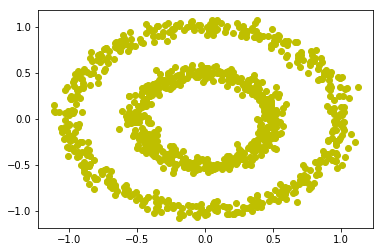

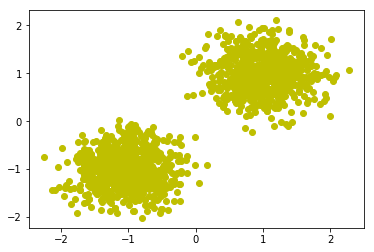

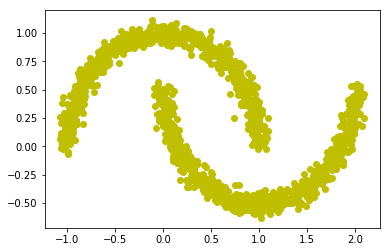

In [7]:
# Plot data

x1, y1 = zip(*circle_dataset) # unpack a list of pairs into two tuples
plt.plot(x1, y1, 'yo')
plt.show()

x1, y1 = zip(*blobs_dataset)
plt.plot(x1, y1, 'yo')
plt.show()

x1, y1 = zip(*moons_dataset)
plt.plot(x1, y1, 'yo')
plt.show()

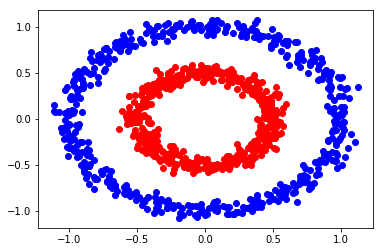

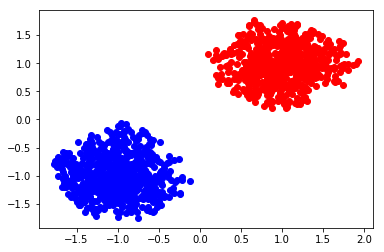

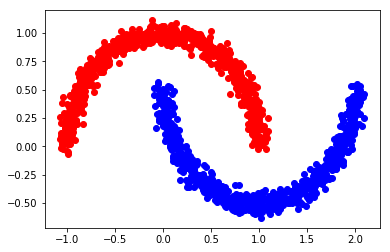

In [8]:
# Cluster data

dbscan(circle_dataset, 0.1, 3)
dbscan(blobs_dataset, 0.1, 3)
dbscan(moons_dataset, 0.1, 3)

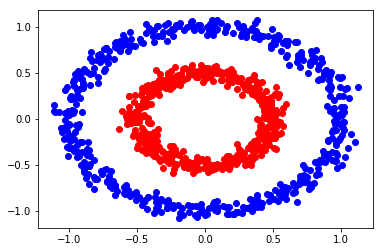

In [9]:
x = DBSCAN(eps=0.1, min_samples=3, metric='euclidean')
pred_labels = x.fit_predict(circle_dataset)
plot_results(pred_labels, circle_dataset)

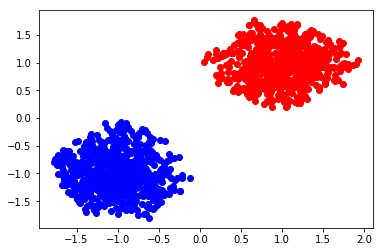

In [10]:
x = DBSCAN(eps=0.1, min_samples=3, metric='euclidean')
pred_labels = x.fit_predict(blobs_dataset)
plot_results(pred_labels, blobs_dataset)

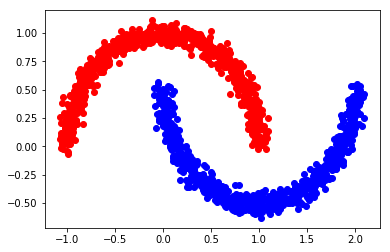

In [11]:
x = DBSCAN(eps=0.1, min_samples=3, metric='euclidean')
pred_labels = x.fit_predict(moons_dataset)
plot_results(pred_labels, moons_dataset)